Linear Regression Results:
Slope (coefficient): -0.0006
Intercept: 2.2441
R-squared: 0.0001
Equation: DCH Price = -0.0006 × DAM Price + 2.2441


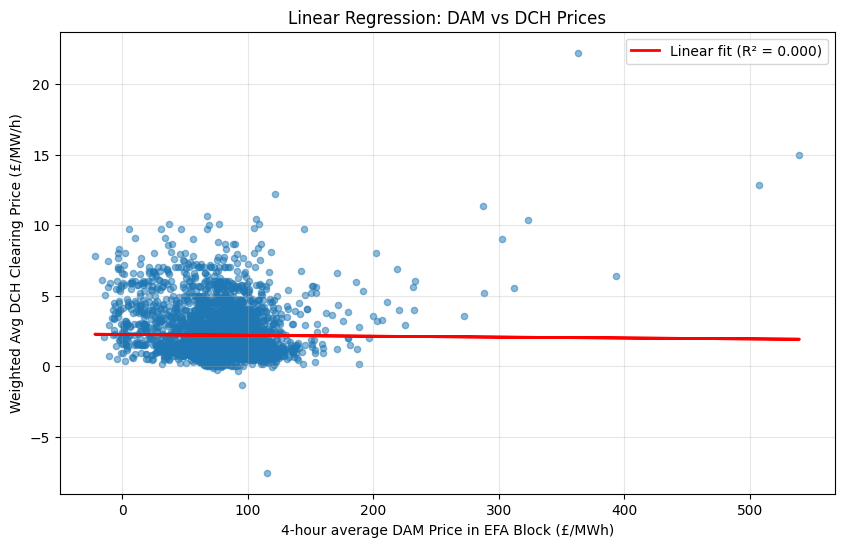


Data summary:
Number of observations: 3635
DAM price range: £-21.82 - £539.60/MWh
DCH price range: £-7.56 - £22.22/MWh


In [6]:
# Simple linear regression between DAM and DCH prices
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load merged data
data = pd.read_csv('DAM_DCH_Merged_Prices.csv')

# Prepare data for regression
X = data['Average DAM price in EFA block'].values.reshape(-1, 1)  # Independent variable
y = data['Weighted_Avg_Clearing_Price'].values  # Dependent variable

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate R-squared
r2 = r2_score(y, y_pred)

# Print results
print(f"Linear Regression Results:")
print(f"Slope (coefficient): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Equation: DCH Price = {model.coef_[0]:.4f} × DAM Price + {model.intercept_:.4f}")

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, s=20)
plt.plot(X, y_pred, 'r-', linewidth=2, label=f'Linear fit (R² = {r2:.3f})')
plt.xlabel('4-hour average DAM Price in EFA Block (£/MWh)')
plt.ylabel('Weighted Avg DCH Clearing Price (£/MW/h)')
plt.title('Linear Regression: DAM vs DCH Prices')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nData summary:")
print(f"Number of observations: {len(data)}")
print(f"DAM price range: £{X.min():.2f} - £{X.max():.2f}/MWh")
print(f"DCH price range: £{y.min():.2f} - £{y.max():.2f}/MWh")

In [1]:
# Try log/exp transformations for better fits
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('DAM_DCH_Merged_Prices.csv')

# Remove negative and zero values for log transformations
data_positive = data[(data['Average DAM price in EFA block'] > 0) & 
                    (data['Weighted_Avg_Clearing_Price'] > 0)].copy()

print(f"Original data: {len(data)} observations")
print(f"Positive data for log transforms: {len(data_positive)} observations")

X = data_positive['Average DAM price in EFA block'].values
y = data_positive['Weighted_Avg_Clearing_Price'].values

# 1. Log-Linear: log(y) = a + b*x
log_y = np.log(y)
model1 = LinearRegression()
model1.fit(X.reshape(-1, 1), log_y)
y_pred1 = np.exp(model1.predict(X.reshape(-1, 1)))
r2_1 = r2_score(y, y_pred1)

# 2. Linear-Log: y = a + b*log(x)
log_x = np.log(X)
model2 = LinearRegression()
model2.fit(log_x.reshape(-1, 1), y)
y_pred2 = model2.predict(log_x.reshape(-1, 1))
r2_2 = r2_score(y, y_pred2)

# 3. Log-Log: log(y) = a + b*log(x)
model3 = LinearRegression()
model3.fit(log_x.reshape(-1, 1), log_y)
y_pred3 = np.exp(model3.predict(log_x.reshape(-1, 1)))
r2_3 = r2_score(y, y_pred3)

# 4. Original linear for comparison (positive data only)
model4 = LinearRegression()
model4.fit(X.reshape(-1, 1), y)
y_pred4 = model4.predict(X.reshape(-1, 1))
r2_4 = r2_score(y, y_pred4)

# Print results
print("\nRegression Results:")
print(f"1. Log-Linear (exp fit):     R² = {r2_1:.4f}")
print(f"2. Linear-Log (log fit):     R² = {r2_2:.4f}")
print(f"3. Log-Log (power fit):      R² = {r2_3:.4f}")
print(f"4. Linear (baseline):        R² = {r2_4:.4f}")

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Log-Linear
ax1.scatter(X, y, alpha=0.5, s=20)
sorted_idx = np.argsort(X)
ax1.plot(X[sorted_idx], y_pred1[sorted_idx], 'r-', linewidth=2)
ax1.set_xlabel('DAM Price (£/MWh)')
ax1.set_ylabel('DCH Price (£/MWh)')
ax1.set_title(f'Log-Linear: DCH = exp(a + b×DAM)\nR² = {r2_1:.4f}')
ax1.grid(True, alpha=0.3)

# 2. Linear-Log
ax2.scatter(X, y, alpha=0.5, s=20)
ax2.plot(X[sorted_idx], y_pred2[sorted_idx], 'r-', linewidth=2)
ax2.set_xlabel('DAM Price (£/MWh)')
ax2.set_ylabel('DCH Price (£/MWh)')
ax2.set_title(f'Linear-Log: DCH = a + b×log(DAM)\nR² = {r2_2:.4f}')
ax2.grid(True, alpha=0.3)

# 3. Log-Log
ax3.scatter(X, y, alpha=0.5, s=20)
ax3.plot(X[sorted_idx], y_pred3[sorted_idx], 'r-', linewidth=2)
ax3.set_xlabel('DAM Price (£/MWh)')
ax3.set_ylabel('DCH Price (£/MWh)')
ax3.set_title(f'Log-Log: DCH = a×DAM^b\nR² = {r2_3:.4f}')
ax3.grid(True, alpha=0.3)

# 4. Linear
ax4.scatter(X, y, alpha=0.5, s=20)
ax4.plot(X[sorted_idx], y_pred4[sorted_idx], 'r-', linewidth=2)
ax4.set_xlabel('DAM Price (£/MWh)')
ax4.set_ylabel('DCH Price (£/MWh)')
ax4.set_title(f'Linear: DCH = a + b×DAM\nR² = {r2_4:.4f}')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Best model details
best_r2 = max(r2_1, r2_2, r2_3, r2_4)
models = ['Log-Linear', 'Linear-Log', 'Log-Log', 'Linear']
best_model = models[np.argmax([r2_1, r2_2, r2_3, r2_4])]

print(f"\nBest fit: {best_model} with R² = {best_r2:.4f}")

if best_model == 'Linear-Log':
    print(f"Best equation: DCH = {model2.intercept_:.3f} + {model2.coef_[0]:.3f} × log(DAM)")
elif best_model == 'Log-Log':
    print(f"Best equation: DCH = {np.exp(model3.intercept_):.3f} × DAM^{model3.coef_[0]:.3f}")
elif best_model == 'Log-Linear':
    print(f"Best equation: DCH = exp({model1.intercept_:.3f} + {model1.coef_[0]:.6f} × DAM)")
else:
    print(f"Best equation: DCH = {model4.intercept_:.3f} + {model4.coef_[0]:.6f} × DAM")

KeyError: 'Weighted_Avg_Clearing_Price'